<a href="https://colab.research.google.com/github/dhyan1999/DL_ML/blob/master/ANN_model_to_classify_handwritten_digit_in_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 7')

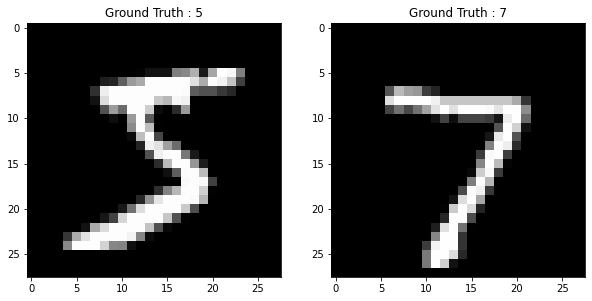

In [ ]:
from tensorflow.keras.utils import to_categorical

print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_labels)
classes_num = len(classes)
print('Total number of outputs : ', classes_num)
print('Output classes : ', classes)

plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

In [ ]:
# Change from matrix to array of dimension 28x28 to array of dimension 784
dim_data = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dim_data)
test_data = test_images.reshape(test_images.shape[0], dim_data)

In [ ]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [ ]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)


In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dim_data,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(classes_num, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/20
235/235 [==============================] - 5s 20ms/step - loss: 24.7607 - accuracy: 0.7932 - val_loss: 0.6467 - val_accuracy: 0.9316
Epoch 2/20
235/235 [==============================] - 4s 18ms/step - loss: 0.5010 - accuracy: 0.9447 - val_loss: 0.5035 - val_accuracy: 0.9377
Epoch 3/20
235/235 [==============================] - 4s 19ms/step - loss: 0.2473 - accuracy: 0.9616 - val_loss: 0.2793 - val_accuracy: 0.9569
Epoch 4/20
235/235 [==============================] - 4s 19ms/step - loss: 0.1747 - accuracy: 0.9703 - val_loss: 0.3587 - val_accuracy: 0.9527
Epoch 5/20
235/235 [==============================] - 4s 19ms/step - loss: 0.1470 - accuracy: 0.9754 - val_loss: 0.3373 - val_accuracy: 0.9581
Epoch 6/20
235/235 [==============================] - 4s 19ms/step - loss: 0.1404 - accuracy: 0.9776 - val_loss: 0.2759 - val_accuracy: 0.9710
Epoch 7/20
235/235 [==============================] - 4s 19ms/step - loss: 0.1341 - accuracy: 0.9798 - val_loss: 0.2777 - val_accuracy: 0.967

In [ ]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.5606 - accuracy: 0.9768
Evaluation result on Test Data : Loss = 0.5606118440628052, accuracy = 0.9768000245094299


Text(0.5, 1.0, 'Loss Curves')

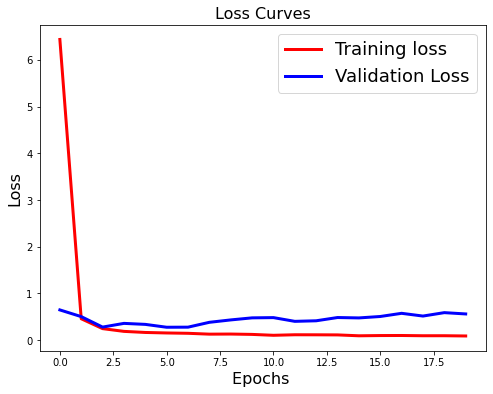

In [ ]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

#Plot the Accuracy Curves


Text(0.5, 1.0, 'Accuracy Curves')

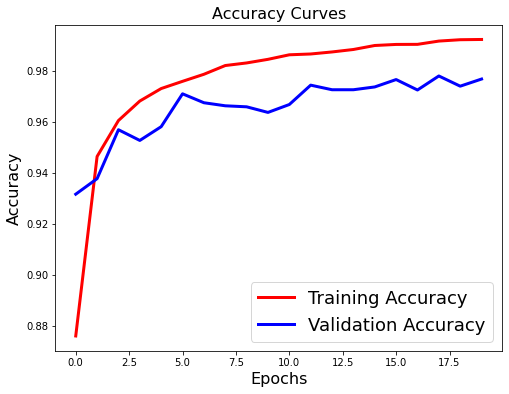

In [ ]:
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
from tensorflow.keras.layers import Dropout

model_reg = Sequential()
model_reg.add(Dense(512, activation='relu', input_shape=(dim_data,)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(classes_num, activation='softmax'))

Epoch 1/20
235/235 [==============================] - 6s 23ms/step - loss: 23.2685 - accuracy: 0.6709 - val_loss: 0.6255 - val_accuracy: 0.9100
Epoch 2/20
235/235 [==============================] - 5s 22ms/step - loss: 1.1786 - accuracy: 0.8398 - val_loss: 0.3590 - val_accuracy: 0.9355
Epoch 3/20
235/235 [==============================] - 5s 22ms/step - loss: 0.6952 - accuracy: 0.8823 - val_loss: 0.2637 - val_accuracy: 0.9448
Epoch 4/20
235/235 [==============================] - 5s 22ms/step - loss: 0.5012 - accuracy: 0.9082 - val_loss: 0.1940 - val_accuracy: 0.9542
Epoch 5/20
235/235 [==============================] - 5s 22ms/step - loss: 0.3930 - accuracy: 0.9206 - val_loss: 0.1509 - val_accuracy: 0.9610
Epoch 6/20
235/235 [==============================] - 5s 22ms/step - loss: 0.3368 - accuracy: 0.9284 - val_loss: 0.1509 - val_accuracy: 0.9616
Epoch 7/20
235/235 [==============================] - 5s 22ms/step - loss: 0.3142 - accuracy: 0.9336 - val_loss: 0.1544 - val_accuracy: 0.960

Text(0.5, 1.0, 'Accuracy Curves')

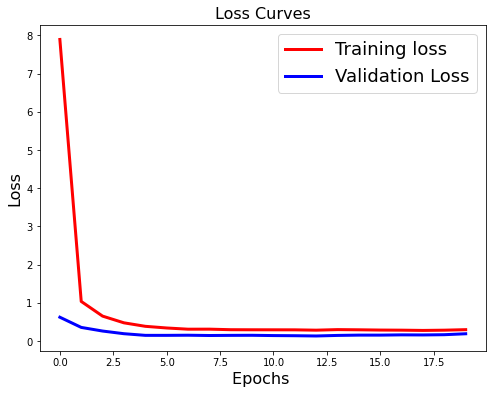

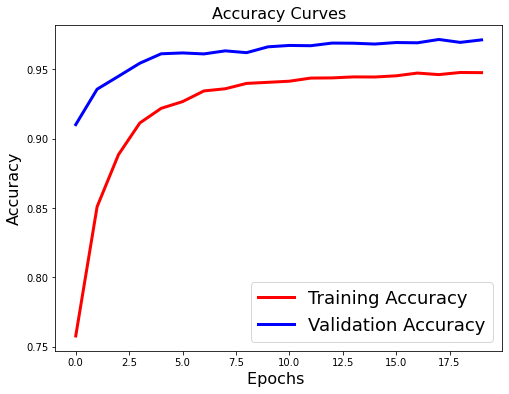

In [ ]:
model_reg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history_reg = model_reg.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                            validation_data=(test_data, test_labels_one_hot))

#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['accuracy'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

Model prediction: 2


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Text(0.5, 1.0, 'Ground Truth : 2')

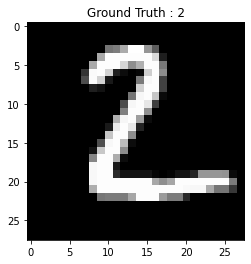

In [ ]:
# Predict the most likely class
print("Model prediction: {}".format(model_reg.predict_classes(test_data[[1],:])[0]))

# Display the predicted image
plt.imshow(test_images[1], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[1]))

In [ ]:
# Predict the probabilities for each class 
model_reg.predict(test_data[[0],:])

array([[0.000000e+00, 0.000000e+00, 0.000000e+00, 9.888026e-38,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 1.508455e-32]], dtype=float32)